# SPE DSEAT Datathon 

### Importing libariries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Datasets

In [5]:
well_df = pd.read_csv("C:/Users/osuol/Desktop/SPE DSEAT/spe_africa_dseats_datathon_2025_wells_dataset.csv")
reservoir_df = pd.read_csv("C:/Users/osuol/Desktop/SPE DSEAT/reservoir_info.csv")

### Previewing the Dataset

In [6]:
print("Shape of the dataset: ", well_df.shape)
well_df.info()

Shape of the dataset:  (7955, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7955 entries, 0 to 7954
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   PROD_DATE                             7955 non-null   object 
 1   WELL_NAME                             7955 non-null   object 
 2   ON_STREAM_HRS                         7955 non-null   float64
 3   BOTTOMHOLE_FLOWING_PRESSURE (PSI)     7955 non-null   object 
 4   DOWNHOLE_TEMPERATURE (deg F)          7955 non-null   float64
 5   ANNULUS_PRESS (PSI)                   7955 non-null   object 
 6   CHOKE_SIZE (%)                        7955 non-null   float64
 7   WELL_HEAD_PRESSURE (PSI)              7955 non-null   object 
 8   WELL_HEAD_TEMPERATURE (deg F)         7955 non-null   float64
 9   CUMULATIVE_OIL_PROD (STB)             7955 non-null   object 
 10  CUMULATIVE_FORMATION_GAS_PROD (MSCF)  7955 non-nul

#### It is established from the info that there is no missing values in our well dataset, since total non-null count is the same as the total entries

In [7]:
well_df.head()

,PROD_DATE,WELL_NAME,ON_STREAM_HRS,BOTTOMHOLE_FLOWING_PRESSURE (PSI),DOWNHOLE_TEMPERATURE (deg F),ANNULUS_PRESS (PSI),CHOKE_SIZE (%),WELL_HEAD_PRESSURE (PSI),WELL_HEAD_TEMPERATURE (deg F),CUMULATIVE_OIL_PROD (STB),CUMULATIVE_FORMATION_GAS_PROD (MSCF),CUMULATIVE_TOTAL_GAS_PROD (MSCF),CUMULATIVE_WATER_PROD (BBL)
0,15-Feb-14,Well_#1,0.0,"4,050",189.866,0,1.17951,482.46,50.864,0,0,0,0
1,16-Feb-14,Well_#1,0.0,"3,961",189.945,0,2.99440,328.601,47.668,0,0,0,0
2,17-Feb-14,Well_#1,0.0,"3,961",190.004,0,1.90349,387.218,48.962,0,0,0,0
3,18-Feb-14,Well_#1,0.0,"3,964",190.020,0,0.00000,308.98,46.636,0,0,0,0
4,19-Feb-14,Well_#1,0.0,"3,965",190.107,0,30.20760,196.057,47.297,0,0,0,0


In [10]:
reservoir_df.head()

,Reservoir Name,Initial Reservoir Pressure (PSI),Bubble Point Pressure (PSI),Current Average Reservoir Pressure (PSI),Solution Gas-Oil-Ratio (SCF/BBL),Formation Volume Factor (RB/STB)
0,ACHI,"3,500","3,300","2,700",800,1.20
1,KEMA,"4,200","4,000","3,900",600,1.45
2,MAKO,"3,500","3,500","3,000",500,1.15
3,DEPU,"2,800","2,800","2,400","1,200",1.37
4,JANI,"4,500","4,300","4,200","1,000",1.30


In [11]:
reservoir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Reservoir Name                            5 non-null      object 
 1   Initial Reservoir Pressure (PSI)          5 non-null      object 
 2   Bubble Point Pressure (PSI)               5 non-null      object 
 3   Current Average Reservoir Pressure (PSI)  5 non-null      object 
 4   Solution Gas-Oil-Ratio (SCF/BBL)          5 non-null      object 
 5   Formation Volume Factor (RB/STB)          5 non-null      float64
dtypes: float64(1), object(5)
memory usage: 372.0+ bytes


#### It is also established here from the info, that there is no missing values in our well datasets, since total non-null count is the same as the total entries

### Cleaning The Data
#### I observed that some of the numeric column in the dataset are read as objects, which are supposed to be numerics.
#### And also the production date to datetime
#### The next line of code converts this column to numerics


In [28]:
# creating a function for the conversion
def convert_to_float(df, columns):
    for col in columns:
        df[col] = pd.to_numeric(df[col].str.replace(',', ''), errors='coerce')
    return df

In [13]:
# Columns we are converting in well_df
well_float_cols = [
    'BOTTOMHOLE_FLOWING_PRESSURE (PSI)',
    'ANNULUS_PRESS (PSI)',
    'WELL_HEAD_PRESSURE (PSI)',
    'CUMULATIVE_OIL_PROD (STB)',
    'CUMULATIVE_FORMATION_GAS_PROD (MSCF)',
    'CUMULATIVE_TOTAL_GAS_PROD (MSCF)',
    'CUMULATIVE_WATER_PROD (BBL)'
]

# Columns we are converting in reservoir_df
reservoir_float_cols = [
    'Initial Reservoir Pressure (PSI)',
    'Bubble Point Pressure (PSI)',
    'Current Average Reservoir Pressure (PSI)',
    'Solution Gas-Oil-Ratio (SCF/BBL)'
]

# Applying the function
well_df = convert_to_float(well_df, well_float_cols)
reservoir_df = convert_to_float(reservoir_df, reservoir_float_cols)

In [14]:
# convertint the production date to datetime format
well_df['PROD_DATE'] = pd.to_datetime(well_df['PROD_DATE'], format='%d-%b-%y')

In [15]:
#confirming changes 
well_df.info()
reservoir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7955 entries, 0 to 7954
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   PROD_DATE                             7955 non-null   datetime64[ns]
 1   WELL_NAME                             7955 non-null   object        
 2   ON_STREAM_HRS                         7955 non-null   float64       
 3   BOTTOMHOLE_FLOWING_PRESSURE (PSI)     7955 non-null   int64         
 4   DOWNHOLE_TEMPERATURE (deg F)          7955 non-null   float64       
 5   ANNULUS_PRESS (PSI)                   7955 non-null   float64       
 6   CHOKE_SIZE (%)                        7955 non-null   float64       
 7   WELL_HEAD_PRESSURE (PSI)              7955 non-null   float64       
 8   WELL_HEAD_TEMPERATURE (deg F)         7955 non-null   float64       
 9   CUMULATIVE_OIL_PROD (STB)             7955 non-null   int64         
 10  

In [27]:
# checking for duplicates
well_df.duplicated().sum()

0

In [22]:
well_df.describe()

,PROD_DATE,ON_STREAM_HRS,BOTTOMHOLE_FLOWING_PRESSURE (PSI),DOWNHOLE_TEMPERATURE (deg F),ANNULUS_PRESS (PSI),CHOKE_SIZE (%),WELL_HEAD_PRESSURE (PSI),WELL_HEAD_TEMPERATURE (deg F),CUMULATIVE_OIL_PROD (STB),CUMULATIVE_FORMATION_GAS_PROD (MSCF),CUMULATIVE_TOTAL_GAS_PROD (MSCF),CUMULATIVE_WATER_PROD (BBL)
count,7955,7955.000000,7955.000000,7955.000000,7955.000000,7955.000000,7955.000000,7955.000000,7.955000e+03,7.955000e+03,7.955000e+03,7.955000e+03
mean,2013-08-26 16:25:49.516027648,21.623497,2613.811816,168.757429,471.339542,56.155295,212.574151,86.836365,1.725855e+05,1.456235e+05,1.811090e+05,1.427100e+05
min,2011-02-17 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2012-08-02 00:00:00,24.000000,2195.000000,150.228500,4.199000,28.130855,68.661500,80.677500,4.769100e+04,3.854150e+04,4.152100e+04,8.907000e+03
50%,2013-06-25 00:00:00,24.000000,2465.000000,158.624000,301.247000,51.068030,113.718000,88.364000,1.092950e+05,1.016100e+05,1.171430e+05,4.651700e+04
75%,2014-10-01 00:00:00,24.000000,3067.000000,202.600000,981.329000,99.800950,161.176500,96.770500,2.424885e+05,1.991035e+05,2.707540e+05,1.949390e+05
max,2016-08-12 00:00:00,25.000000,4096.000000,212.153000,1639.040000,100.000000,1787.760000,182.157000,1.129301e+06,1.458660e+06,1.458660e+06,1.499262e+06
std,NaN,6.567826,687.600640,31.917787,481.638340,34.975408,282.193044,22.738615,1.740827e+05,1.721685e+05,1.970784e+05,2.221567e+05


### Saving the clean file, so as to share among the team

In [ ]:
well_df.to_csv('cleaned_wells_dataset.csv', index=False)

In [ ]:
reservoir_df.to_csv('cleaned_reservoir_dataset.csv', index=False)

## DATASET EXPLORATION

### Identified the number of unique wells and their names to confirm the dataset contains all 20 wells for analysis.

In [20]:
print("The total number of wells is: ", well_df['WELL_NAME'].nunique())
well_df['WELL_NAME'].unique()

The total number of wells is:  20


array(['Well_#1', 'Well_#2', 'Well_#3', 'Well_#4', 'Well_#5', 'Well_#6',
       'Well_#7', 'Well_#8', 'Well_#9', 'Well_#10', 'Well_#11',
       'Well_#12', 'Well_#13', 'Well_#14', 'Well_#15', 'Well_#16',
       'Well_#17', 'Well_#18', 'Well_#19', 'Well_#20'], dtype=object)

### Understanding the well trends
#### Plotted cumulative oil production for all 20 wells to compare production trends across the dataset.

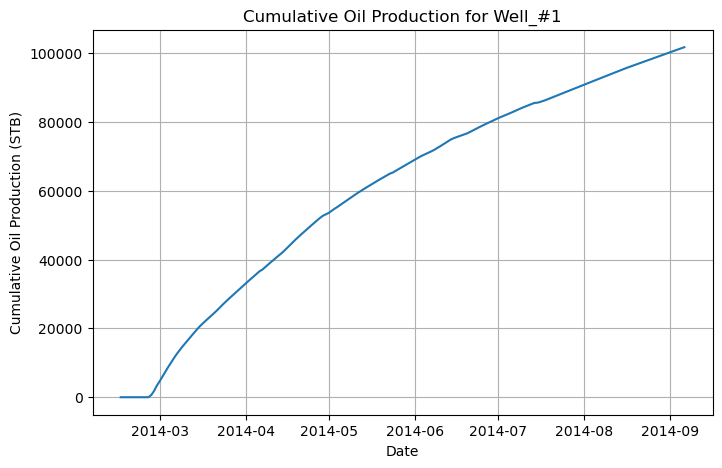

In [23]:
# Filter for Well_#1
well_1 = well_df[well_df['WELL_NAME'] == 'Well_#1']

# Plot
plt.figure(figsize=(8, 5))
plt.plot(well_1['PROD_DATE'], well_1['CUMULATIVE_OIL_PROD (STB)'])
plt.xlabel('Date')
plt.ylabel('Cumulative Oil Production (STB)')
plt.title('Cumulative Oil Production for Well_#1')
plt.grid(True)
plt.savefig('well_1_oil_prod.png')
plt.show()

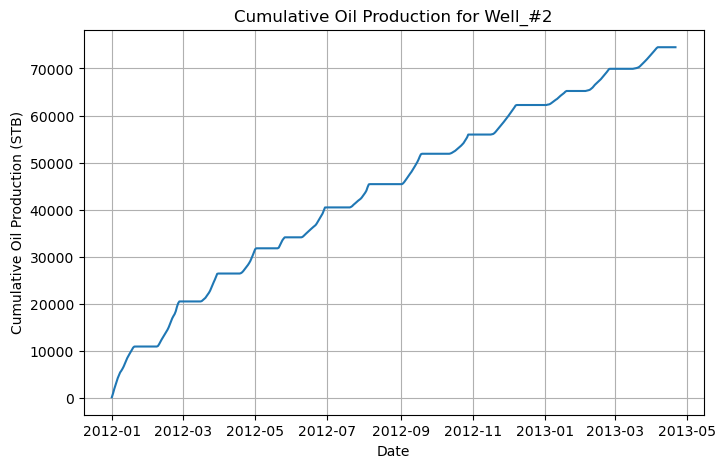

In [24]:
# Filter for Well_#2
well_2 = well_df[well_df['WELL_NAME'] == 'Well_#2']

# Plot
plt.figure(figsize=(8, 5))
plt.plot(well_2['PROD_DATE'], well_2['CUMULATIVE_OIL_PROD (STB)'])
plt.xlabel('Date')
plt.ylabel('Cumulative Oil Production (STB)')
plt.title('Cumulative Oil Production for Well_#2')
plt.grid(True)
plt.savefig('well_2_oil_prod.png')  # Save as PNG
plt.show()

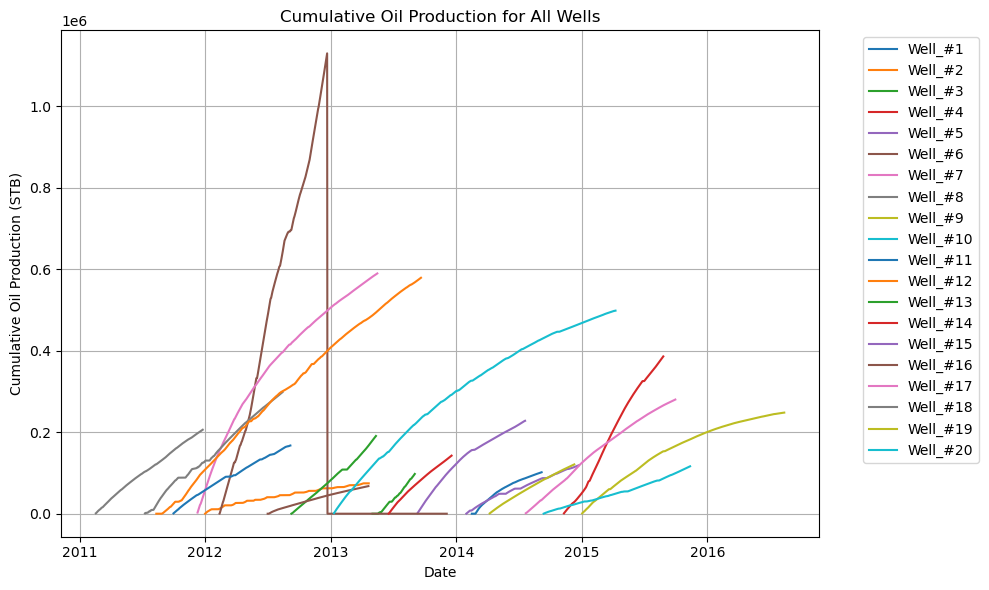

In [25]:
# Plot all wells
plt.figure(figsize=(10, 6))
for well in well_df['WELL_NAME'].unique():
    well_data = well_df[well_df['WELL_NAME'] == well]
    plt.plot(well_data['PROD_DATE'], well_data['CUMULATIVE_OIL_PROD (STB)'], label=well)
plt.xlabel('Date')
plt.ylabel('Cumulative Oil Production (STB)')
plt.title('Cumulative Oil Production for All Wells')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('all_wells_oil_prod.png')
plt.show()

In [29]:
!git add .

In [30]:
!git 

Nothing specified, nothing added.
hint: Maybe you wanted to say 'git add .'?
hint: Turn this message off by running
hint: "git config advice.addEmptyPathspec false"
